In [1]:
library(ggplot2)
library(viridis)
library(ggbeeswarm)
library(dplyr)
library(cowplot)
library(qvalue)

Loading required package: viridisLite

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [3]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]

In [4]:
leads.ips.sign$stage = 'ips'
leads.mes.sign$stage = 'mesendo'
leads.defendo.sign$stage = 'defendo'

In [5]:
cols = c("snp_id","feature","stage","chrom","p_value")

In [6]:
all_leads = rbind(leads.ips.sign[,cols],
                 leads.mes.sign[,cols],
                 leads.defendo.sign[,cols])

In [7]:
summary_filename = paste0(mydir,"/MOFA5/new4/summary.csv")
df = read.csv(summary_filename, row.names = 1)
df0 = all_leads
for (chrom in 1:22){
    print(c(chrom, length(unique(df[df$chrom == chrom,]$gene)),length(unique(df0[df0$chrom == chrom,]$feature))))
}

ERROR: Error in paste0(mydir, "/MOFA5/new4/summary.csv"): object 'mydir' not found


In [ ]:
chrom_1 = all_leads[all_leads$chrom == 1,]
nrow(chrom_1)
length(unique(chrom_1$feature))
eqtls_1 = paste0(chrom_1$feature,"-",chrom_1$snp_id)
length(unique(eqtls_1))

In [ ]:
head(chrom_1,2)

In [ ]:
# sampled_genes_30 = as.character(sample(unique(chrom_22$feature),30))
# head(sampled_genes_30)
# length(sampled_genes_30)

In [ ]:
###################################################### 
###################################################### 
###################################################### 

In [ ]:
###################################################### 
#### MOFA factors as envs (up to 10)
# computed from logcounts(sce)
# no normalization

In [8]:
###################################################### 
##### all cells, all donors (no filtering)

In [9]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [31]:
file = paste0(mydir,"/MOFA1/new4/summary.csv")
file = paste0(mydir,"/MOFA2/new4/summary.csv")
file = paste0(mydir,"/MOFA5/new4/summary.csv")
file = paste0(mydir,"/MOFA10/new4/summary.csv")
file = paste0(mydir,"/MOFA20/new4/summary.csv")
df = read.csv(file, row.names=1)
nrow(df)
# df = df[df$gene %in% chrom_1$feature,]
nrow(df)
head(df,2)

[1] 4470

[1] 4470

gene                  n_snps chrom pv_raw      snpID           pv         
0 ENSG00000140905_GCSH  1      16    0.003361229 16_81118466_A_G 0.003361229
1 ENSG00000011523_CEP68 2       2    0.041930290 2_65279223_C_T  0.083860579

In [32]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
# df$qv = p.adjust(df$pv, method = "BH")
df$qv = qvalue(df$pv, pi0 = 1)$qvalue

In [21]:
mofa1 = c(nrow(df), nrow(df[df$qv<0.05,]),nrow(df[df$qv<0.05,])/nrow(df))
mofa1

[1] 3.240000e+03 1.880000e+02 5.802469e-02

In [24]:
mofa2 = c(nrow(df), nrow(df[df$qv<0.05,]),nrow(df[df$qv<0.05,])/nrow(df))
mofa2

[1] 3.240000e+03 2.220000e+02 6.851852e-02

In [27]:
mofa5 = c(nrow(df), nrow(df[df$qv<0.05,]),nrow(df[df$qv<0.05,])/nrow(df))
mofa5

[1] 3.240000e+03 2.650000e+02 8.179012e-02

In [30]:
mofa10 = c(nrow(df), nrow(df[df$qv<0.05,]),nrow(df[df$qv<0.05,])/nrow(df))
mofa10

[1] 3.240000e+03 3.220000e+02 9.938272e-02

In [33]:
mofa20 = c(nrow(df), nrow(df[df$qv<0.05,]),nrow(df[df$qv<0.05,])/nrow(df))
mofa20

[1] 3240.000000  525.000000    0.162037

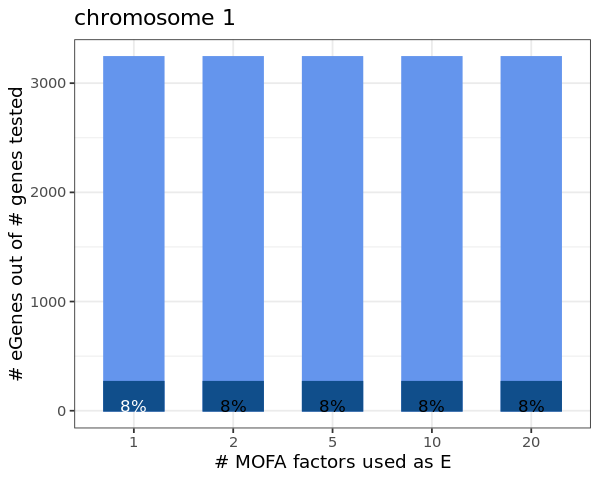

In [17]:
# Chromosome 1
df = data.frame(n_MOFA = c(1,2,5,10,20), 
                n_eGenes = c(mofa1[2], mofa2[2], mofa5[2], mofa10[2], mofa20[2]), 
                n_genes = c(mofa1[1], mofa2[1], mofa5[1], mofa10[1], mofa20[1]))
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 1") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + theme_bw() +
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=40, label= paste0(round(mofa1[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=40, label= paste0(round(mofa2[3],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=3, y=40, label= paste0(round(mofa5[3],digits=2)*100,"%"), size = 3.5, col = "black") +
    annotate("text", x=4, y=40, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "black")+
    annotate("text", x=5, y=40, label= paste0(round(mofa20[3],digits=2)*100,"%"), size = 3.5, col = "black")

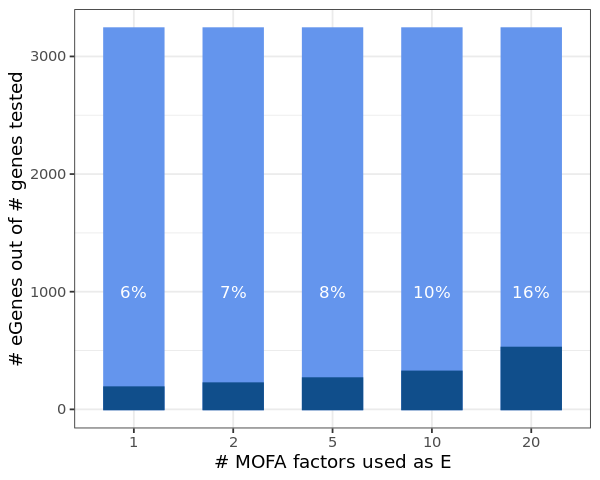

In [34]:
# All chromosomes
df = data.frame(n_MOFA = c(1,2,5,10,20), 
                n_eGenes = c(mofa1[2], mofa2[2], mofa5[2], mofa10[2], mofa20[2]), 
                n_genes = c(mofa1[1], mofa2[1], mofa5[1], mofa10[1], mofa20[1]))
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + #ggtitle("chromosome 1") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + theme_bw() +
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=1000, label= paste0(round(mofa1[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=1000, label= paste0(round(mofa2[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=1000, label= paste0(round(mofa5[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=1000, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")+
    annotate("text", x=5, y=1000, label= paste0(round(mofa20[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [35]:
df

n_MOFA n_eGenes n_genes
1  1     188      3240   
2  2     222      3240   
3  5     265      3240   
4 10     322      3240   
5 20     525      3240

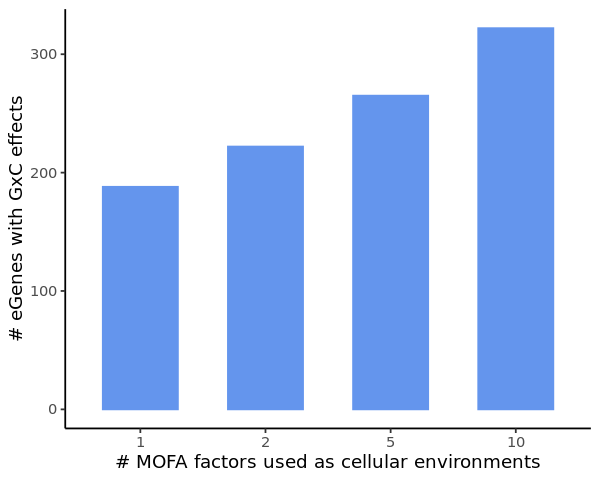

In [42]:
ggplot(df[df$n_MOFA != 20,], aes(x = as.factor(n_MOFA), y = n_eGenes)) + #ggtitle("chromosome 1") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
#     geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
#              fill = "dodgerblue4", col = "dodgerblue4") + 
    theme_classic() +
    xlab("# MOFA factors used as cellular environments") + ylab("# eGenes with GxC effects") #+
#     annotate("text", x=1, y=1000, label= paste0(round(mofa1[3],digits=2)*100,"%"), size = 3.5, col = "white") +
#     annotate("text", x=2, y=1000, label= paste0(round(mofa2[3],digits=2)*100,"%"), size = 3.5, col = "white") +
#     annotate("text", x=3, y=1000, label= paste0(round(mofa5[3],digits=2)*100,"%"), size = 3.5, col = "white") +
#     annotate("text", x=4, y=1000, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [29]:
### calibration (permuting E from GxE only, i.e. H1)

In [30]:
prefixes = c("1mofa_factor_endo_eqtl","2mofa_factors_endo_eqtl","5mofa_factors_endo_eqtl","10mofa_factors_endo_eqtl")

In [31]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1) 
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

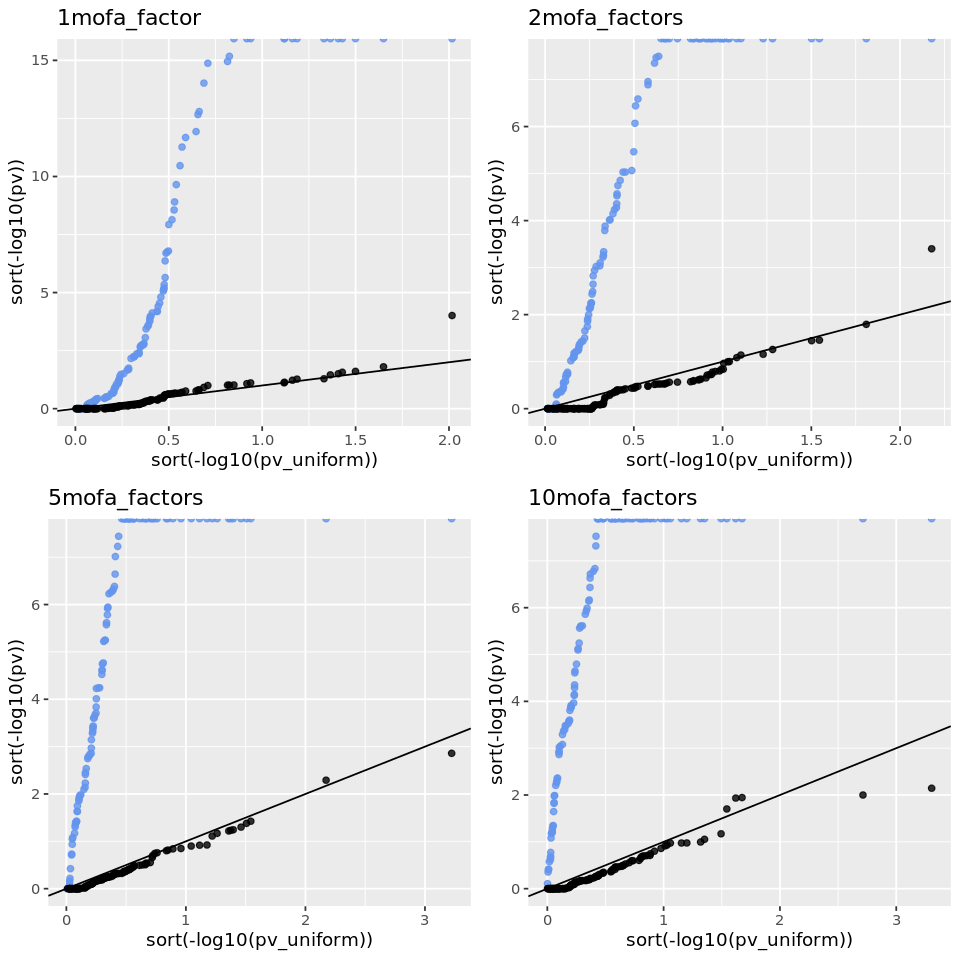

In [32]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

In [33]:
# calibration permuting G (GxE, H1)

In [82]:
prefixes

[1] "1mofa_factor_endo_eqtl"   "2mofa_factors_endo_eqtl" 
[3] "5mofa_factors_endo_eqtl"  "10mofa_factors_endo_eqtl"

In [114]:
prefix = prefixes[1]
file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
df0 = read.csv(file0, row.names=1)
c(nrow(df0),
nrow(df0[df0$pv_adj < 0.01,]),
nrow(df0[df0$pv_adj < 0.01,])/nrow(df0))
head(df0[df0$pv_adj < 0.01,])

[1] 4.470000e+03 2.550000e+02 5.704698e-02

gene                     n_snps pv_raw snpID           pv pv_adj
76  ENSG00000124942_AHNAK    1      0      11_62199457_C_T 0  0     
109 ENSG00000104219_ZDHHC2   1      0      8_17013199_T_C  0  0     
119 ENSG00000185885_IFITM1   1      0      11_302505_T_G   0  0     
140 ENSG00000156261_CCT8     3      0      21_30462771_A_G 0  0     
178 ENSG00000128394_APOBEC3F 2      0      22_39441096_G_T 0  0     
179 ENSG00000148680_HTR7     2      0      10_92540879_C_A 0  0

In [128]:
prefix = prefixes[1]
file0 = paste0(mydir,prefix,"_permuteG/summary_endo_eqtl_all_perms.csv")
df0 = read.csv(file0, row.names=1)
head(df0,2)

gene                  perm   pv_raw     snpID          
0 ENSG00000184674_GSTT1 perm35 0.04392233 22_24295427_C_T
1 ENSG00000196419_XRCC6 perm27 0.06600071 22_42045141_A_T

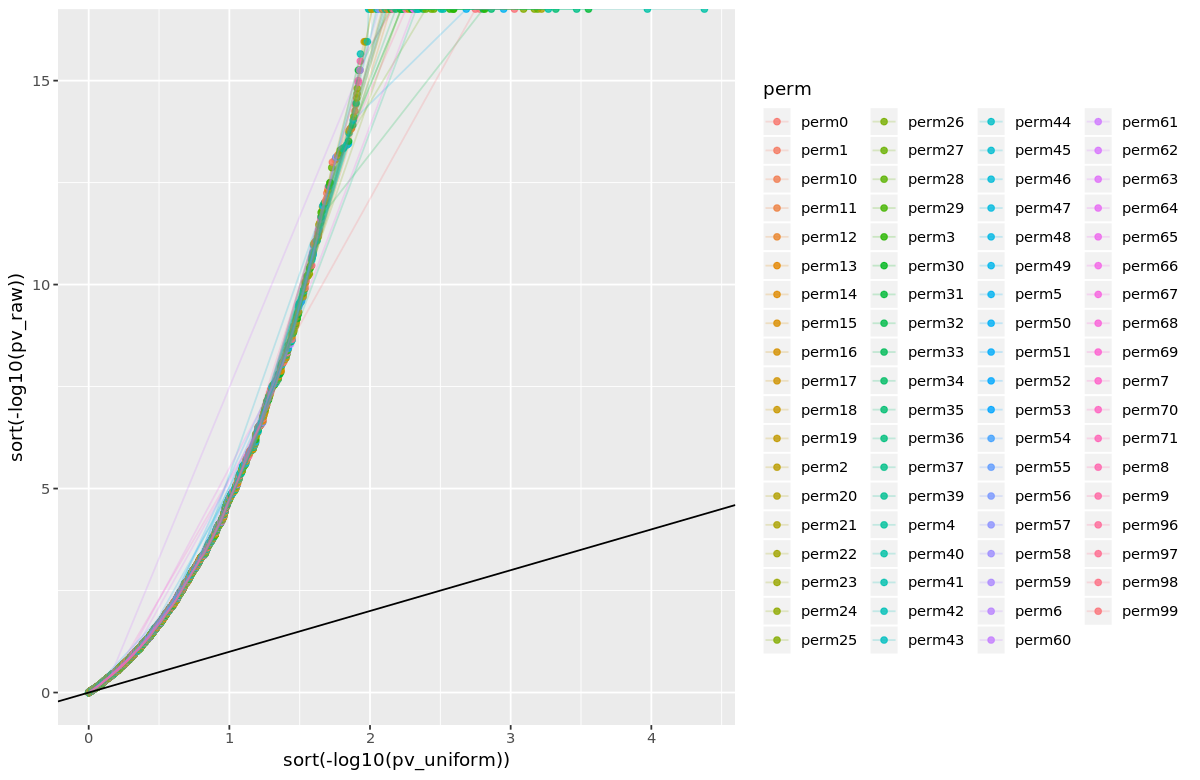

In [130]:
options(repr.plot.width = 10, repr.plot.height = 6.5)
df0$pv_uniform = runif(n = nrow(df0), min = 0, max = 1)
ggplot(df0, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)), col = perm)) + 
        geom_point(alpha = 0.8) + geom_line(alpha = 0.2) + geom_abline(slope = 1) #+ ylim(c(0,5))

In [111]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"_permuteG/summary_endo_eqtl_perms1.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm1","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "forestgreen", alpha = 0.8)
    p = p + geom_abline(slope = 1) + ylim(c(0,8))
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

Warning message:
“Removed 14 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

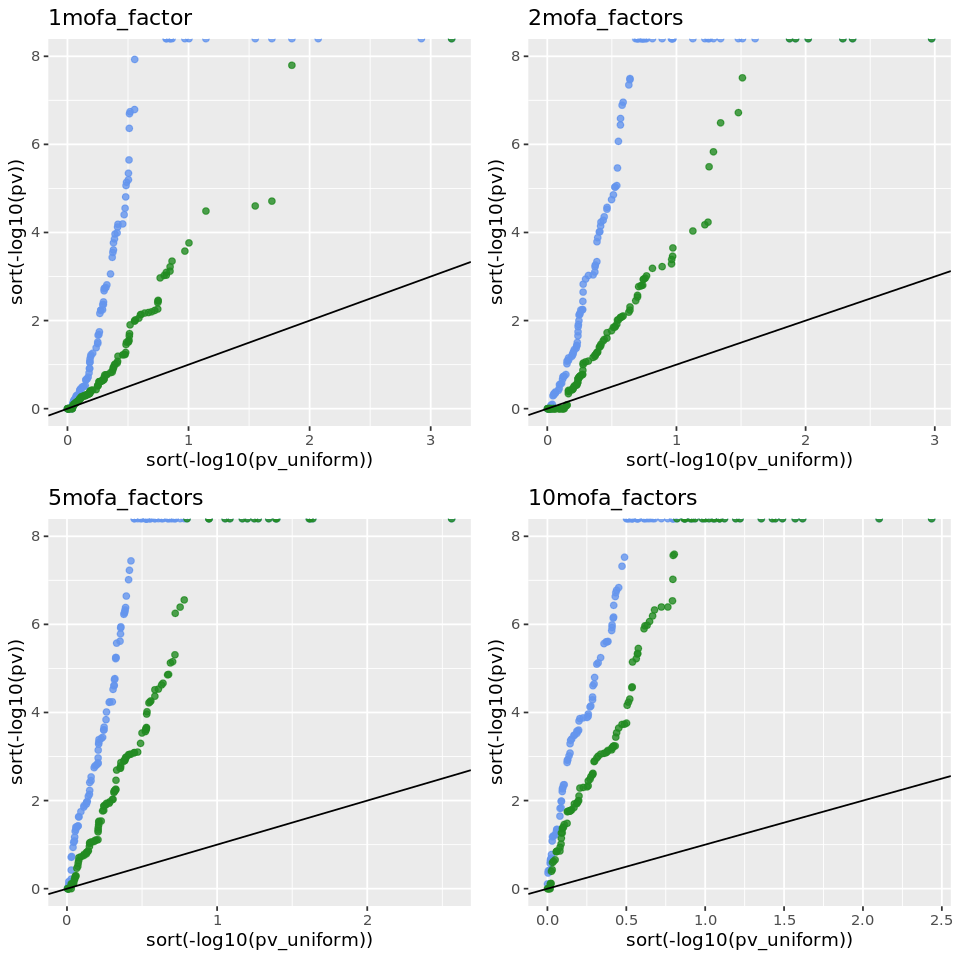

In [112]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

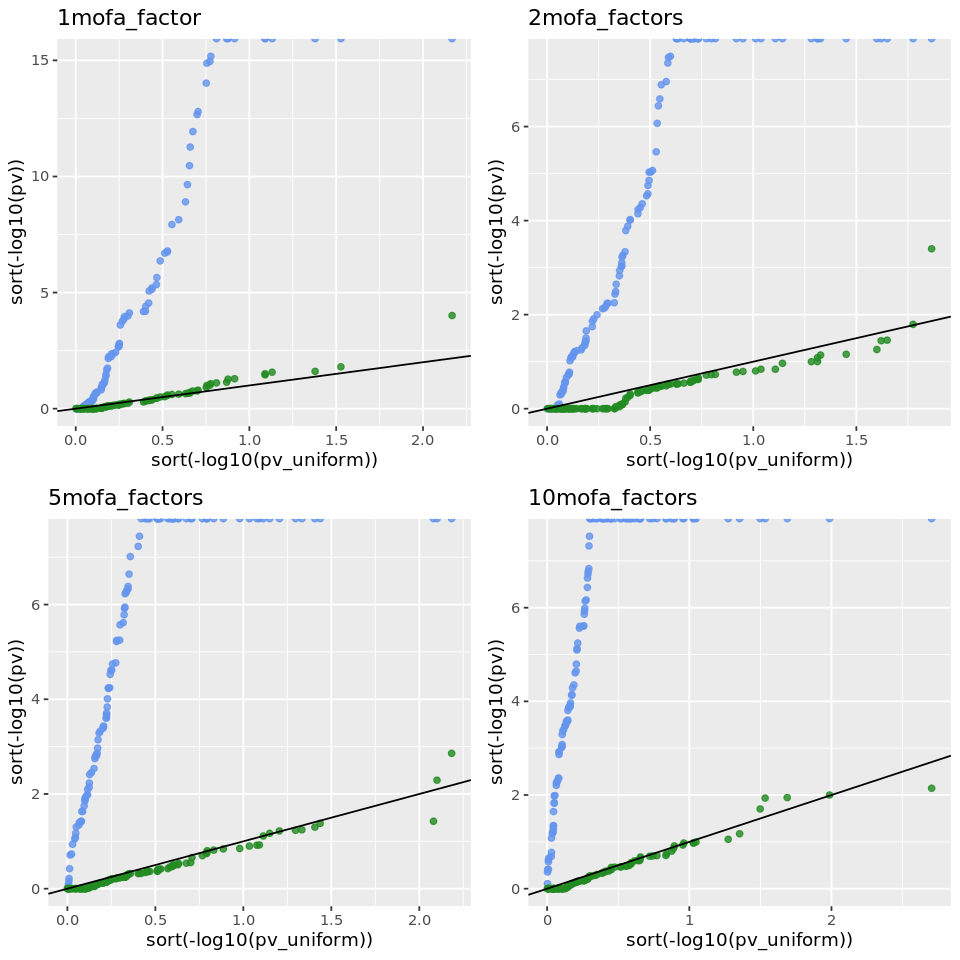

In [299]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

In [35]:
### comparison between results (scatterplot)

In [36]:
length(prefixes)

[1] 4

In [37]:
k = 1
plist = list()
labs = gsub("mofa_factor_endo_eqtl","",gsub("mofa_factors_endo_eqtl","",prefixes))
for (i in 1:(length(prefixes)-1)){
    prefix = prefixes[i]
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    for (j in (i+1):length(prefixes)){
        file1 = paste0(mydir,prefixes[j],"/summary_endo_eqtl.csv")
        df1 = read.csv(file1, row.names=1)
        df1 = df1[df1$gene %in% chrom_22$feature,] 
        df = inner_join(df0, df1,by = c("gene","snpID","n_snps"))
        p = ggplot(df, aes(x = -log10(pv.x), y = -log10(pv.y)))
        p = p + geom_point(alpha = 0.8, col = "firebrick") 
        p = p + geom_abline(slope = 1, col = "firebrick")
        plist[[k]] = p + ggtitle(paste0(labs[i]," vs ",labs[j], " MOFA, R = ", 
                                        round(cor(df$pv.x, df$pv.y), digits = 2))) 
        k = k+1
    }
} 

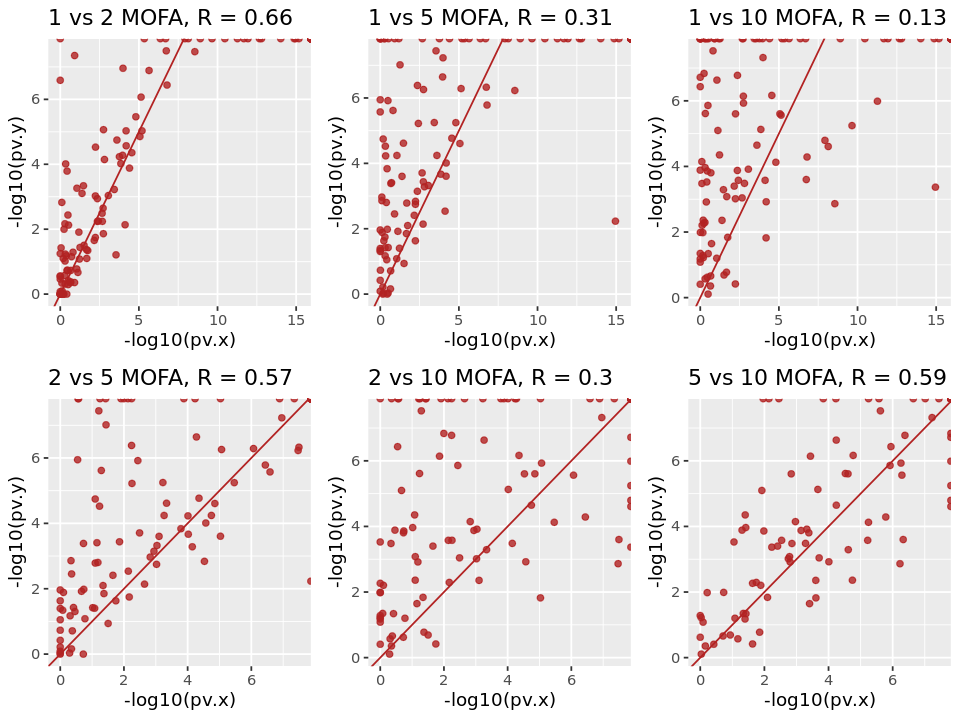

In [38]:
options(repr.plot.width = 8, repr.plot.height = 6)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 3)

In [39]:
##### bootstrap (80% cells) 100 times
## 1,2,5,10 MOFA

In [127]:
prefixes = c("1mofa_factor_endo_eqtl_bootstrap","2mofa_factors_endo_eqtl_bootstrap",
             "5mofa_factors_endo_eqtl_bootstrap","10mofa_factors_endo_eqtl_bootstrap")

In [128]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromsome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

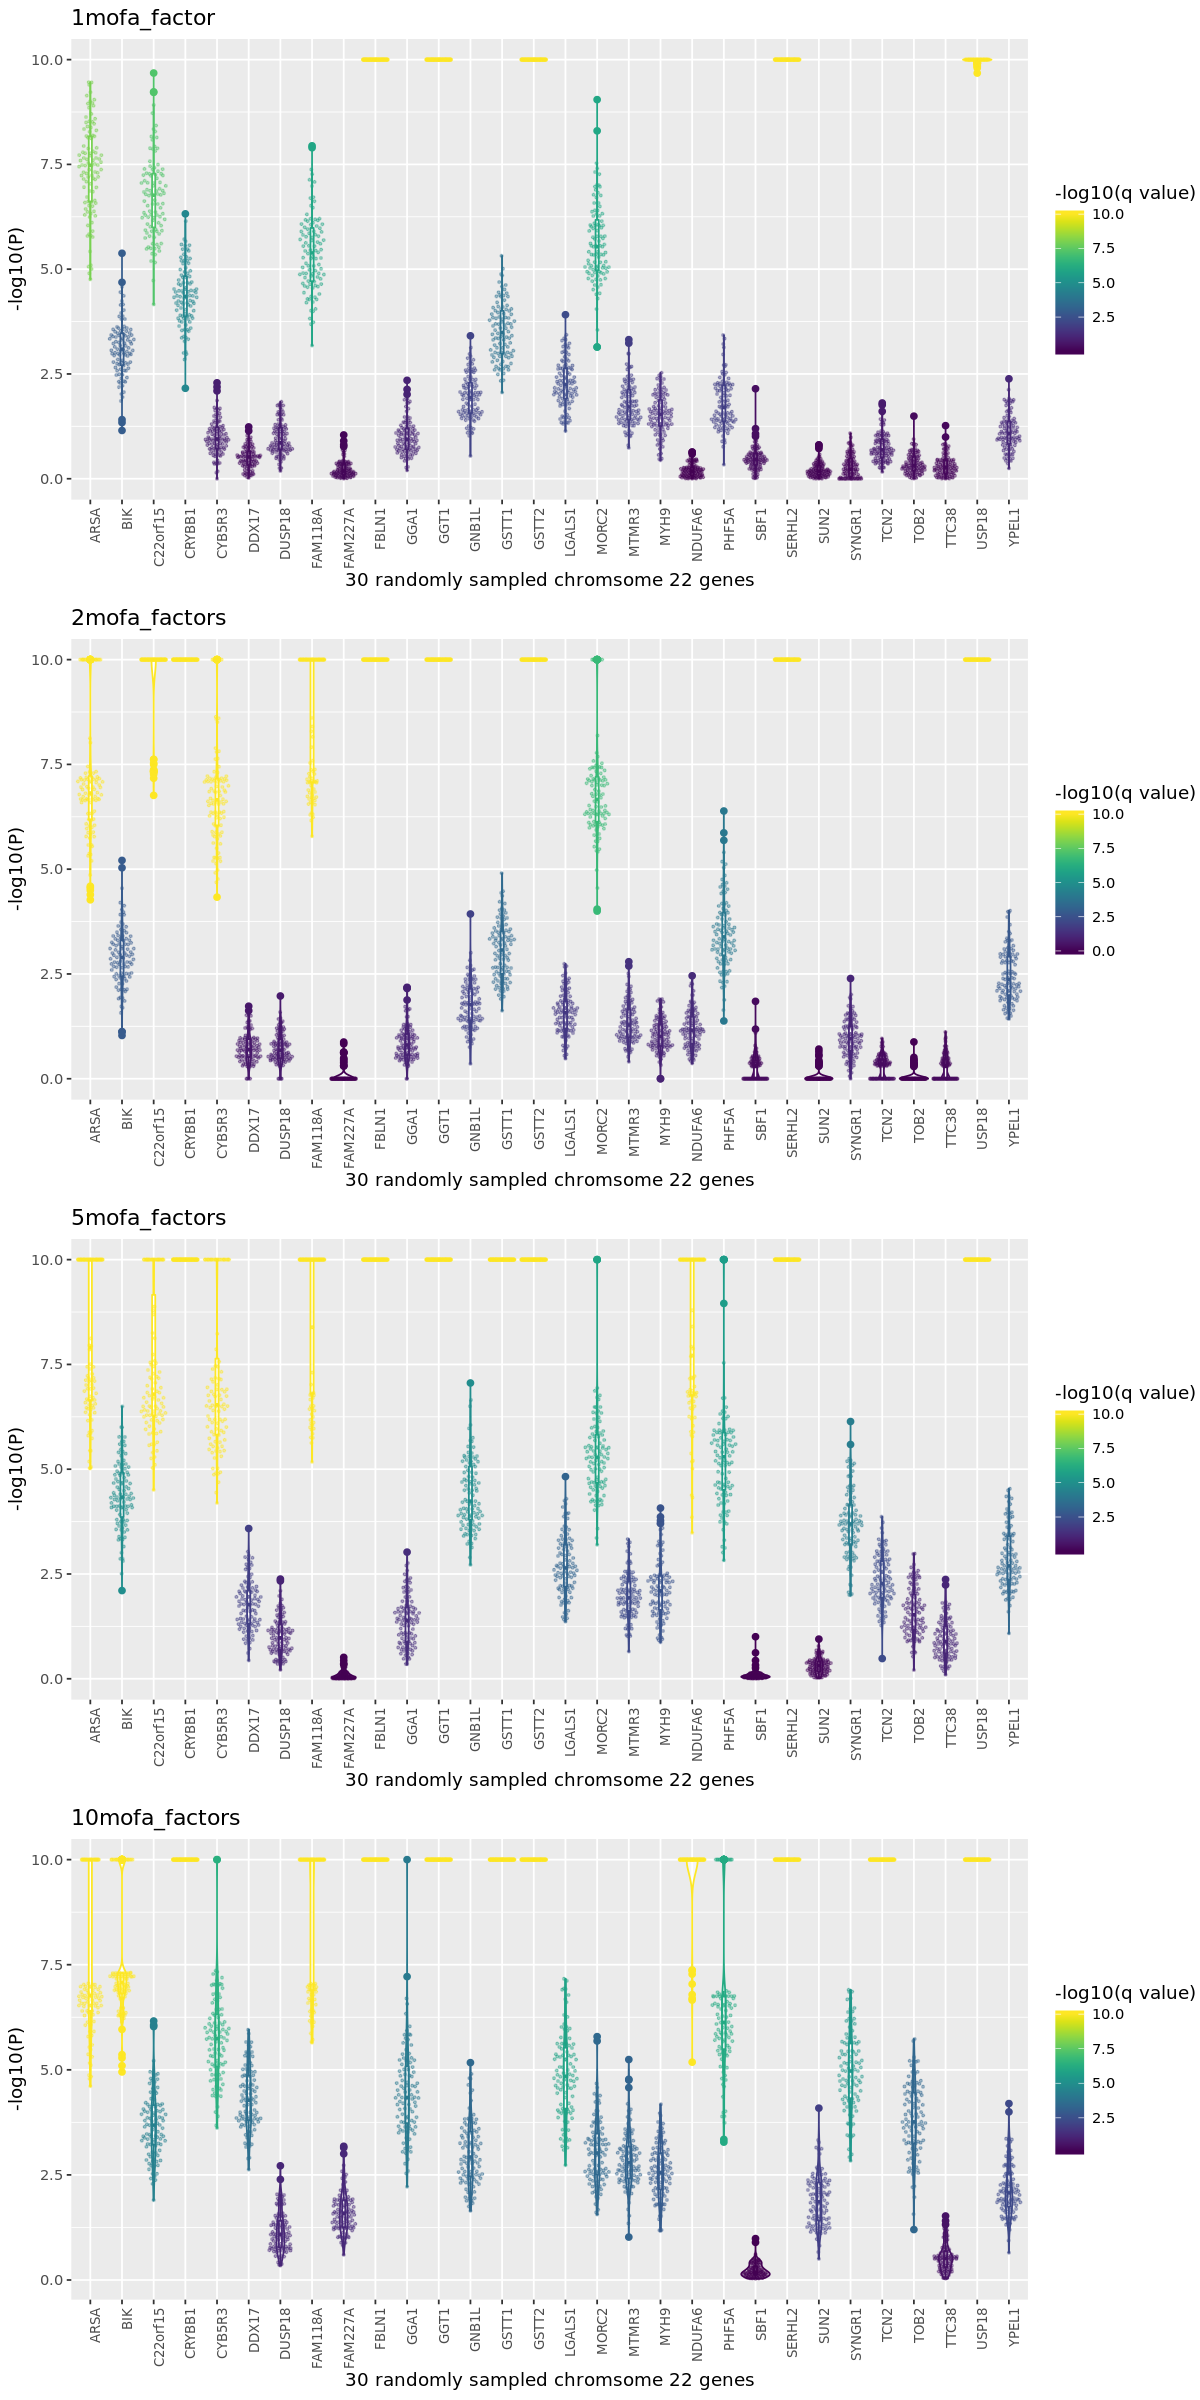

In [129]:
options(repr.plot.width = 10, repr.plot.height = 20)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 1)

In [ ]:
#### adding covariates (library size as well as non linear pseudotime, squared and cubic)

In [42]:
prefixes = c("10mofa_factors_endo_eqtl_covs")
for (prefix in prefixes){
    file = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df = read.csv(file, row.names = 1)
    df = df[df$gene %in% chrom_22$feature,]
    df = df[order(df$pv, df$pv_raw),]
    df = df[-which(duplicated(df$gene)),]
    df$qv = p.adjust(df$pv, method = "BH")
    print(c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df)))
}

[1] 88.0000000 76.0000000  0.8636364


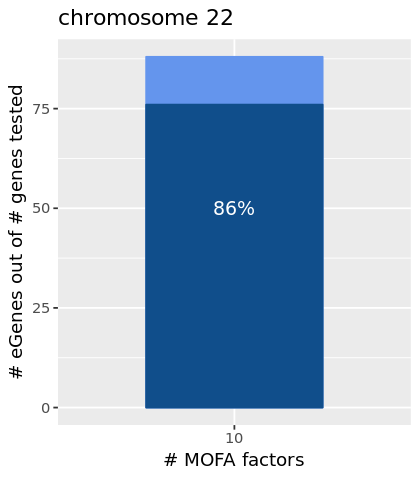

In [49]:
df = data.frame(n_MOFA = c(10), n_eGenes = c(76), n_genes = 88)
options(repr.plot.width = 3.5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors") + ylab("# eGenes out of # genes tested") + 
    annotate("text", x=1, y=50, label= "86%", size = 4, col = "white")

In [47]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

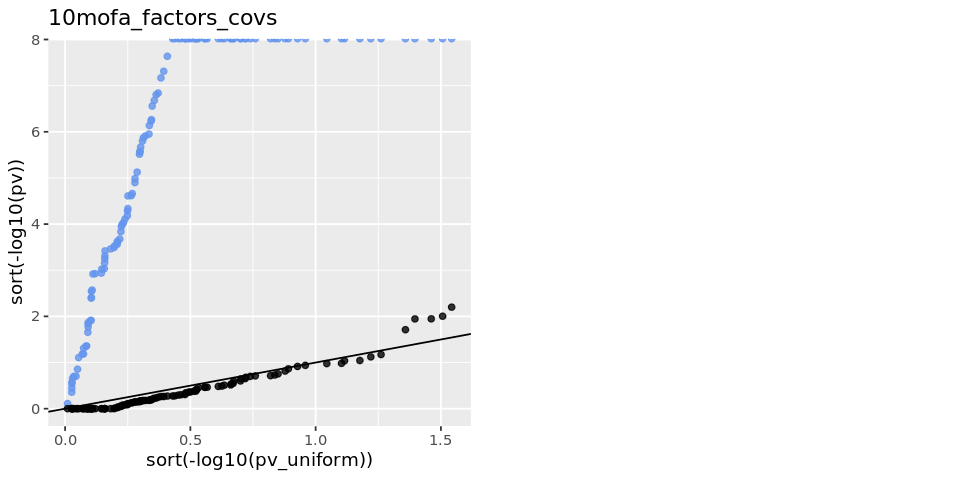

In [48]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(plist[[1]],ncol = 2)

In [76]:
### set of random non eQTl variants

In [101]:
prefixes = c("10mofa_factors_endo_noneqtl")
for (prefix in prefixes){
    file = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df = read.csv(file, row.names = 1)
#     df = df[df$gene %in% chrom_22$feature,]
    df = df[order(df$pv, df$pv_raw),]
    df = df[-which(duplicated(df$gene)),]
    df$qv = p.adjust(df$pv, method = "BH")
    print(c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df)))
}

[1] 180.0000000 116.0000000   0.6444444


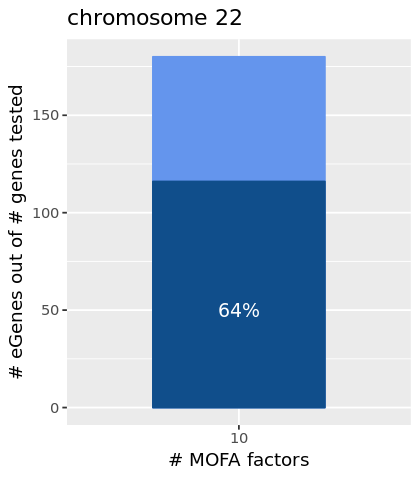

In [102]:
df = data.frame(n_MOFA = c(10), n_eGenes = c(116), n_genes = 180)
options(repr.plot.width = 3.5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors") + ylab("# eGenes out of # genes tested") + 
    annotate("text", x=1, y=50, label= "64%", size = 4, col = "white")

In [103]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

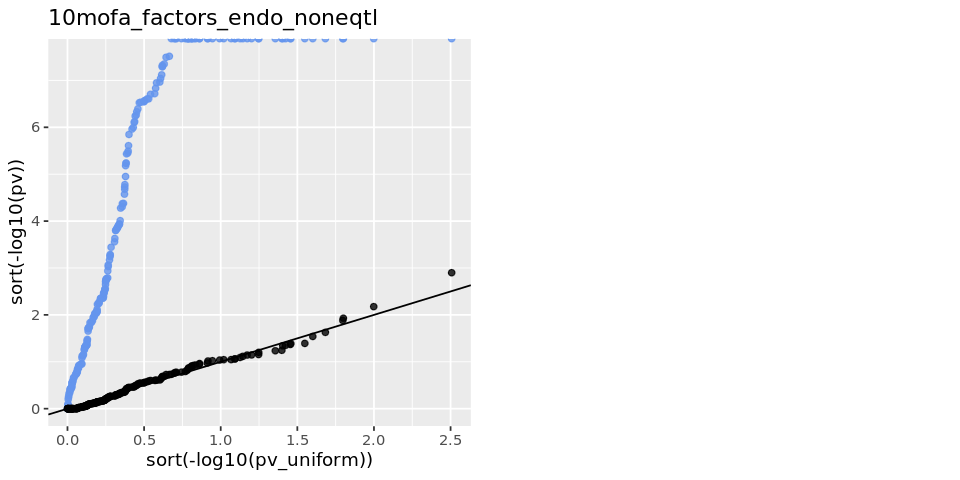

In [104]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(plist[[1]],ncol = 2)

In [43]:
#########################################################
##### filtering donors (only keep donors with > N cells)
### N = 50, 100

In [44]:
prefixes = c("10mofa_factors_endo_eqtl_over50cell_donors","10mofa_factors_endo_eqtl_over100cell_donors")
for (prefix in prefixes){
    file = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df = read.csv(file, row.names = 1)
    df = df[df$gene %in% chrom_22$feature,]
    df = df[order(df$pv, df$pv_raw),]
    df = df[-which(duplicated(df$gene)),]
    df$qv = p.adjust(df$pv, method = "BH")
    N = gsub("10mofa_factors_endo_eqtl_over","",gsub("cell_donors","",prefix))
    print(paste0("Filtering donors with over ", N ," cells"))
    print(c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df)))
}

[1] "Filtering donors with over 50 cells"
[1] 88.0000000 74.0000000  0.8409091
[1] "Filtering donors with over 100 cells"
[1] 88.0000000 70.0000000  0.7954545


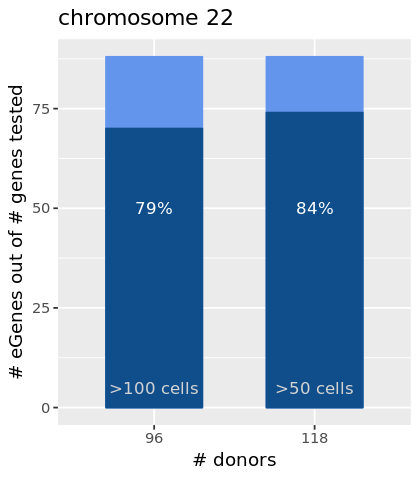

In [45]:
df = data.frame(n_donors = c(96,118), n_eGenes = c(70,74), n_genes = 88)
options(repr.plot.width = 3.5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_donors), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_donors), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# donors") + ylab("# eGenes out of # genes tested") + 
    annotate("text", x=1, y=5, label= ">100 cells", size = 3.5, col = "lightgrey") +
    annotate("text", x=2, y=5, label= ">50 cells", size = 3.5, col = "lightgrey") +
    annotate("text", x=1, y=50, label= "79%", size = 3.5, col = "white") +
    annotate("text", x=2, y=50, label= "84%", size = 3.5, col = "white")

[1] 0.7934811

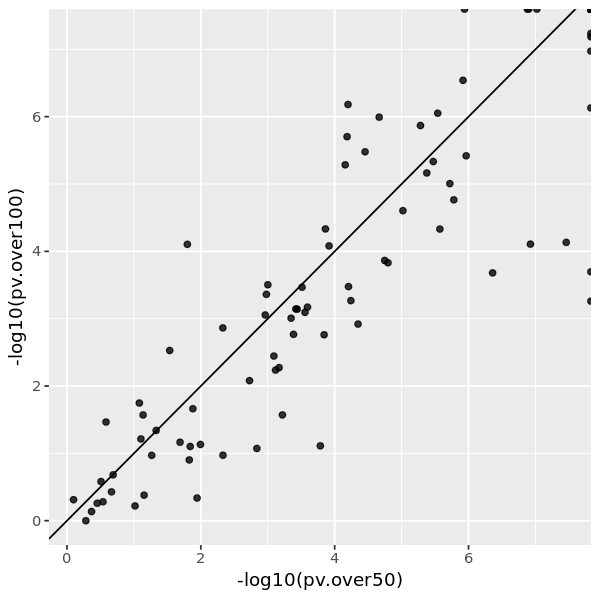

In [46]:
file0 = paste0(mydir,prefixes[1],"/summary_endo_eqtl.csv")
df0 = read.csv(file0, row.names = 1)
file1 = paste0(mydir,prefixes[2],"/summary_endo_eqtl.csv")
df1 = read.csv(file1, row.names = 1)
df = inner_join(df0,df1, by = c("gene","snpID","n_snps"), suffix = c(".over50",".over100"))
df = df[df$gene %in% chrom_22$feature,]

cor(df$pv.over50, df$pv.over100)
options(repr.plot.width = 5, repr.plot.height = 5) 
ggplot(df, aes(x = -log10(pv.over50), y = -log10(pv.over100))) + geom_point(alpha = 0.8) + geom_abline(slope=1) 

In [47]:
prefixes

[1] "10mofa_factors_endo_eqtl_over50cell_donors" 
[2] "10mofa_factors_endo_eqtl_over100cell_donors"

In [48]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

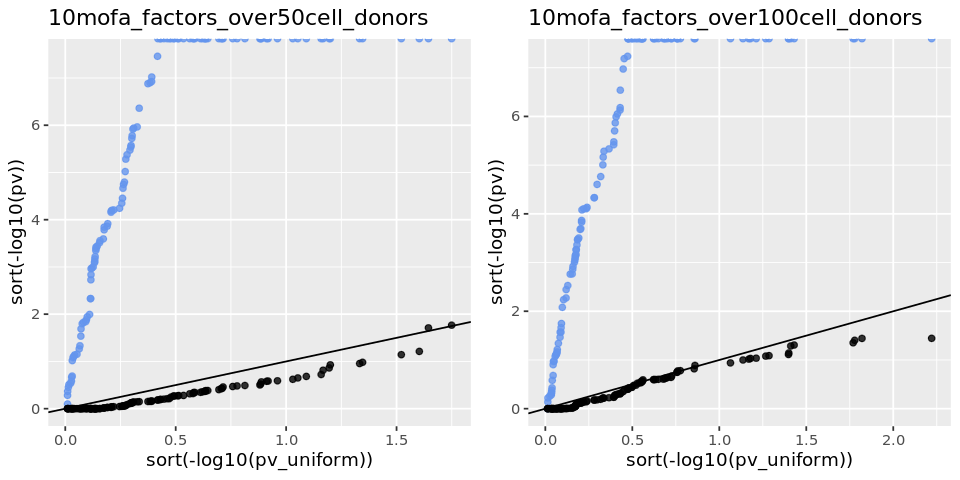

In [49]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(plist[[1]],plist[[2]],ncol = 2)

In [1]:
#########################################################
##### downsampling cells
##### only consider N cells per donor
## implied that we only consider donor with > N cells
## N = 50, 100

In [20]:
prefixes = c("10mofa_factors_endo_eqtl_downsample50","10mofa_factors_endo_eqtl_downsample100")
for (prefix in prefixes){
    file = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df = read.csv(file, row.names = 1)
    df = df[df$gene %in% chrom_22$feature,]
    df = df[order(df$pv, df$pv_raw),]
    df = df[-which(duplicated(df$gene)),]
    df$qv = p.adjust(df$pv, method = "BH")
    N = gsub("10mofa_factors_endo_eqtl_downsample","",prefix)
    print(paste0("Downsample to only ", N ," cells per donor"))
    print(c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df)))
}

[1] "Downsample to only 50 cells per donor"
[1] 88.0000000 67.0000000  0.7613636
[1] "Downsample to only 100 cells per donor"
[1] 88.0000000 54.0000000  0.6136364


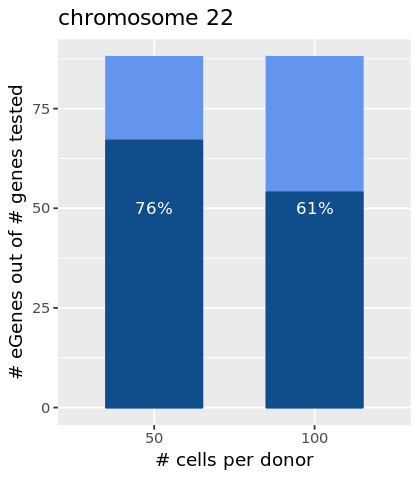

In [21]:
df = data.frame(ncells_per_donor = c(50,100), n_eGenes = c(67,54), n_genes = 88)
options(repr.plot.width = 3.5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(ncells_per_donor), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(ncells_per_donor), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# cells per donor") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=50, label= "76%", size = 3.5, col = "white") +
    annotate("text", x=2, y=50, label= "61%", size = 3.5, col = "white")

[1] 0.5183132

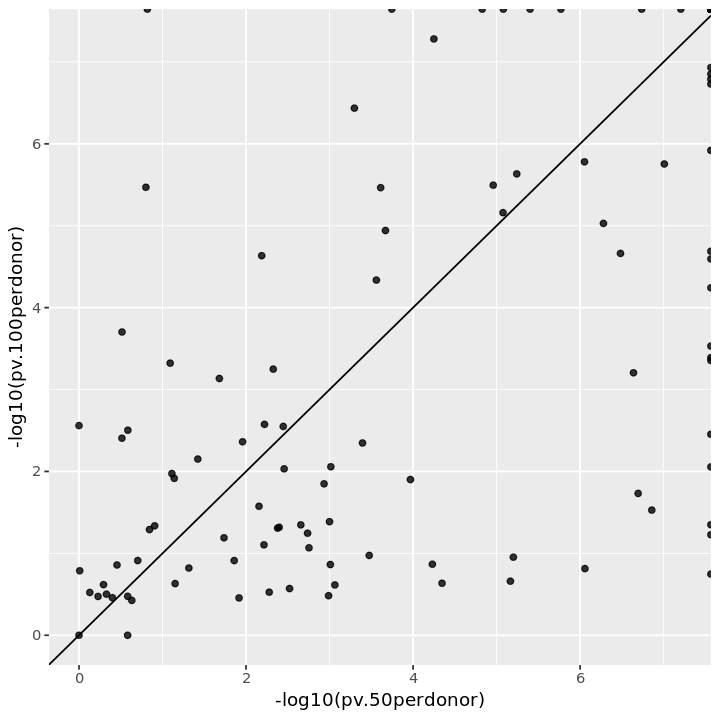

In [22]:
file0 = paste0(mydir,prefixes[1],"/summary_endo_eqtl.csv")
df0 = read.csv(file0, row.names = 1)
file1 = paste0(mydir,prefixes[2],"/summary_endo_eqtl.csv")
df1 = read.csv(file1, row.names = 1)
df = inner_join(df0,df1, by = c("gene","snpID","n_snps"), suffix = c(".50perdonor",".100perdonor"))
# df = df[df$gene %in% chrom_22$feature,]
cor(df$pv.50perdonor, df$pv.100perdonor)
options(repr.plot.width = 6, repr.plot.height = 6) 
ggplot(df, aes(x = -log10(pv.50perdonor), y = -log10(pv.100perdonor))) + geom_point(alpha = 0.8) + geom_abline(slope=1) 

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 0.06752195

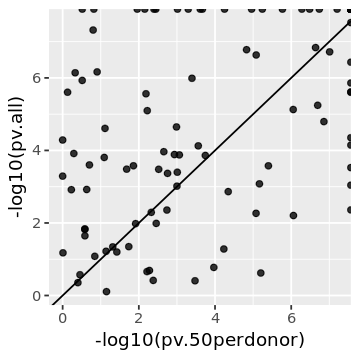

In [10]:
file2 = paste0(mydir,"/10mofa_factors_endo_eqtl/summary_endo_eqtl.csv")
df2 = read.csv(file2, row.names = 1)
df3 = inner_join(df0,df2, by = c("gene","snpID","n_snps"), suffix = c(".50perdonor",".all"))
cor(df3$pv.50perdonor, df3$pv.all)
ggplot(df3, aes(x = -log10(pv.50perdonor), y = -log10(pv.all))) + geom_point(alpha = 0.8) + geom_abline(slope=1) 

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 0.1737443

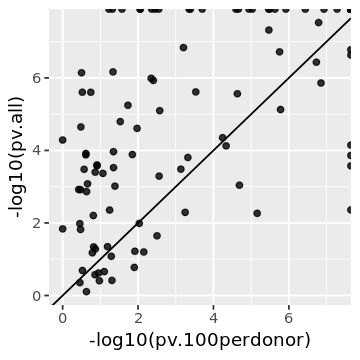

In [211]:
df4 = inner_join(df1,df2, by = c("gene","snpID","n_snps"), suffix = c(".100perdonor",".all"))
cor(df4$pv.100perdonor, df4$pv.all)
ggplot(df4, aes(x = -log10(pv.100perdonor), y = -log10(pv.all))) + geom_point(alpha = 0.8) + geom_abline(slope=1) 

In [212]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

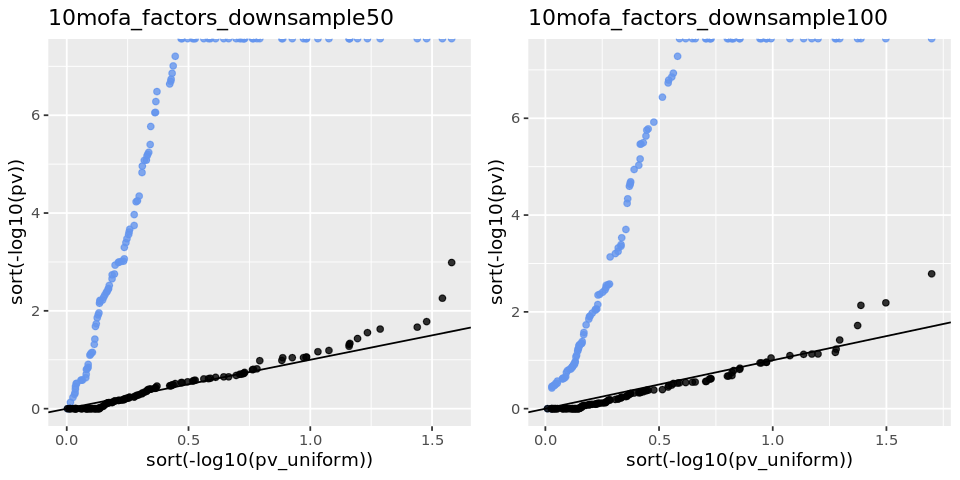

In [213]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot_grid(plist[[1]],plist[[2]],ncol = 2)

In [28]:
prefixes = c("10mofa_factors_endo_eqtl_bootstrap_downsample50","10mofa_factors_endo_eqtl_bootstrap_downsample100")
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromsome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")


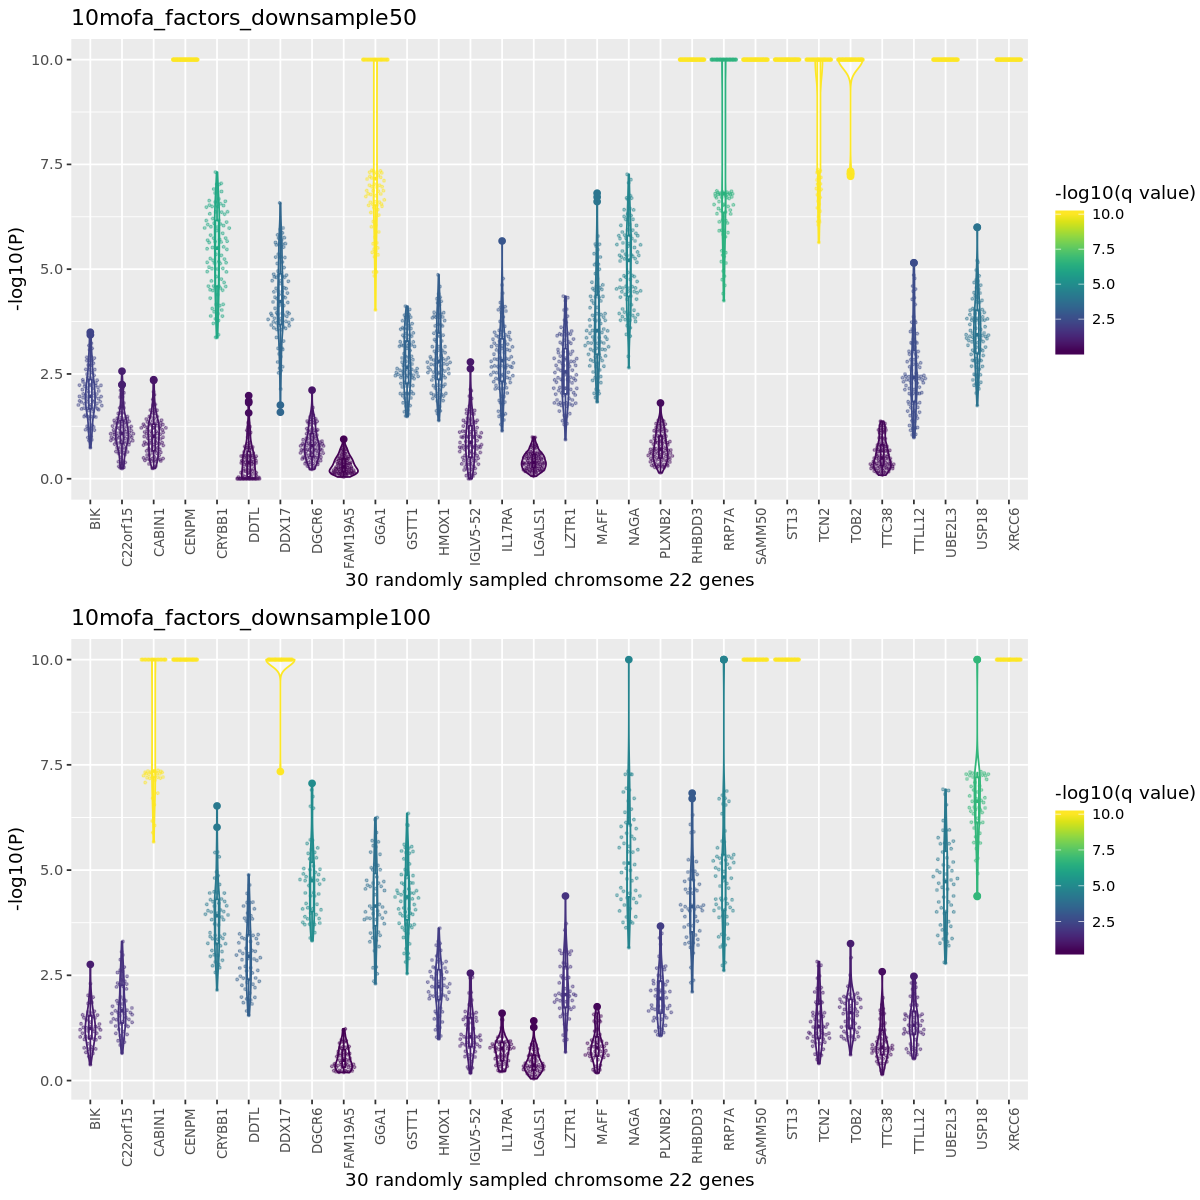

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot_grid(plist[[1]],plist[[2]],ncol = 1)

In [ ]:
#########################################################
##### gaussianize E
## all cells, all donors

In [561]:
file = paste0(mydir,"/10mofa_factors_endo_eqtl_gaussE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/5mofa_factors_endo_eqtl_gaussE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/2mofa_factors_endo_eqtl_gaussE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/1mofa_factor_endo_eqtl_gaussE/summary_endo_eqtl.csv")
df = read.csv(file, row.names=1)
nrow(df)
head(df,2)

[1] 121

gene                  n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A 3      4.787039e-07 22_42896474_T_C 1.436112e-06
1 ENSG00000189306_RRP7A 3      1.961614e-06 22_42897414_A_C 5.884843e-06

In [562]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
df$qv = p.adjust(df$pv, method = "BH")

In [554]:
mofa1 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa1

[1] 88.0000000 40.0000000  0.4545455

In [557]:
mofa2 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa2

[1] 88.0000000 46.0000000  0.5227273

In [560]:
mofa5 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa5

[1] 88.0000000 68.0000000  0.7727273

In [563]:
mofa10 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa10

[1] 88.0000000 75.0000000  0.8522727

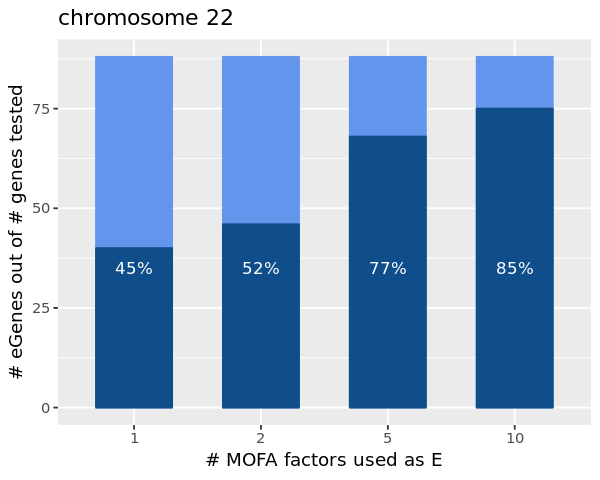

In [564]:
df = data.frame(n_MOFA = c(1,2,5,10), n_eGenes = c(mofa1[2], mofa2[2], mofa5[2], mofa10[2]), n_genes = mofa1[1])
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=35, label= paste0(round(mofa1[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=35, label= paste0(round(mofa2[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=35, label= paste0(round(mofa5[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=35, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [695]:
prefixes = c("1mofa_factor_endo_eqtl_gaussE","2mofa_factors_endo_eqtl_gaussE",
             "5mofa_factors_endo_eqtl_gaussE","10mofa_factors_endo_eqtl_gaussE")

In [696]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

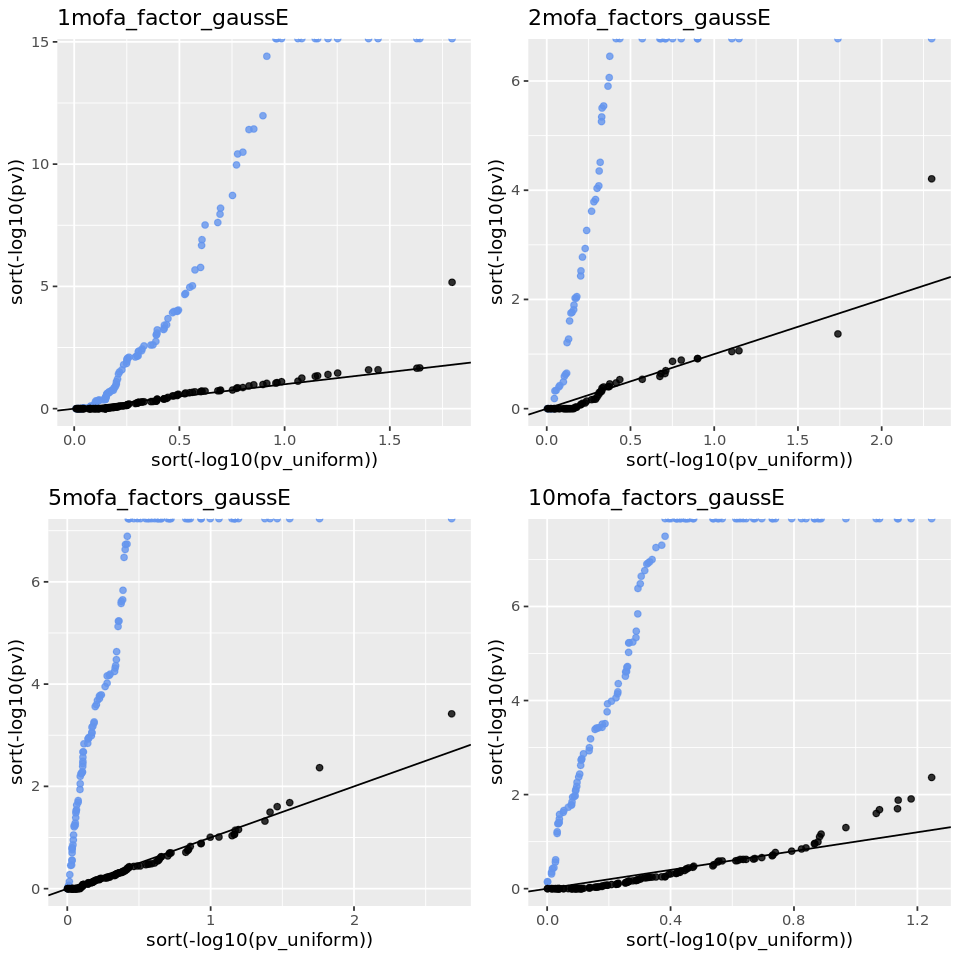

In [697]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

In [698]:
k = 1
plist = list()
labs = gsub("mofa_factor_endo_eqtl_gaussE","",gsub("mofa_factors_endo_eqtl_gaussE","",prefixes))
for (i in 1:(length(prefixes)-1)){
    prefix = prefixes[i]
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    for (j in (i+1):length(prefixes)){
        file1 = paste0(mydir,prefixes[j],"/summary_endo_eqtl.csv")
        df1 = read.csv(file1, row.names=1)
        df1 = df1[df1$gene %in% chrom_22$feature,] 
        df = inner_join(df0, df1,by = c("gene","snpID","n_snps"))
        p = ggplot(df, aes(x = -log10(pv.x), y = -log10(pv.y)))
        p = p + geom_point(alpha = 0.8, col = "firebrick") 
        p = p + geom_abline(slope = 1, col = "firebrick")
        plist[[k]] = p + ggtitle(paste0(labs[i]," vs ",labs[j], " MOFA, R = ", 
                                        round(cor(df$pv.x, df$pv.y), digits = 2))) 
        k = k+1
    }
} 

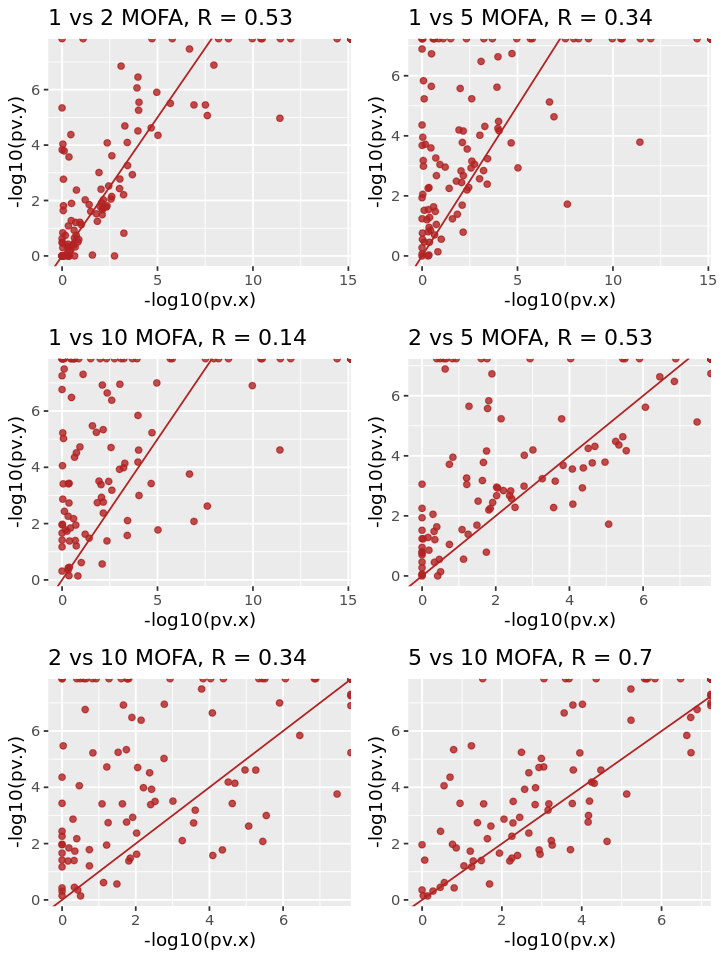

In [699]:
options(repr.plot.width = 6, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 2)

In [197]:
prefixes = c("1mofa_factor_endo_eqtl_bootstrap_gaussE",
             "2mofa_factors_endo_eqtl_bootstrap_gaussE",
             "5mofa_factors_endo_eqtl_bootstrap_gaussE",
             "10mofa_factors_endo_eqtl_bootstrap_gaussE")

In [200]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromsome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")


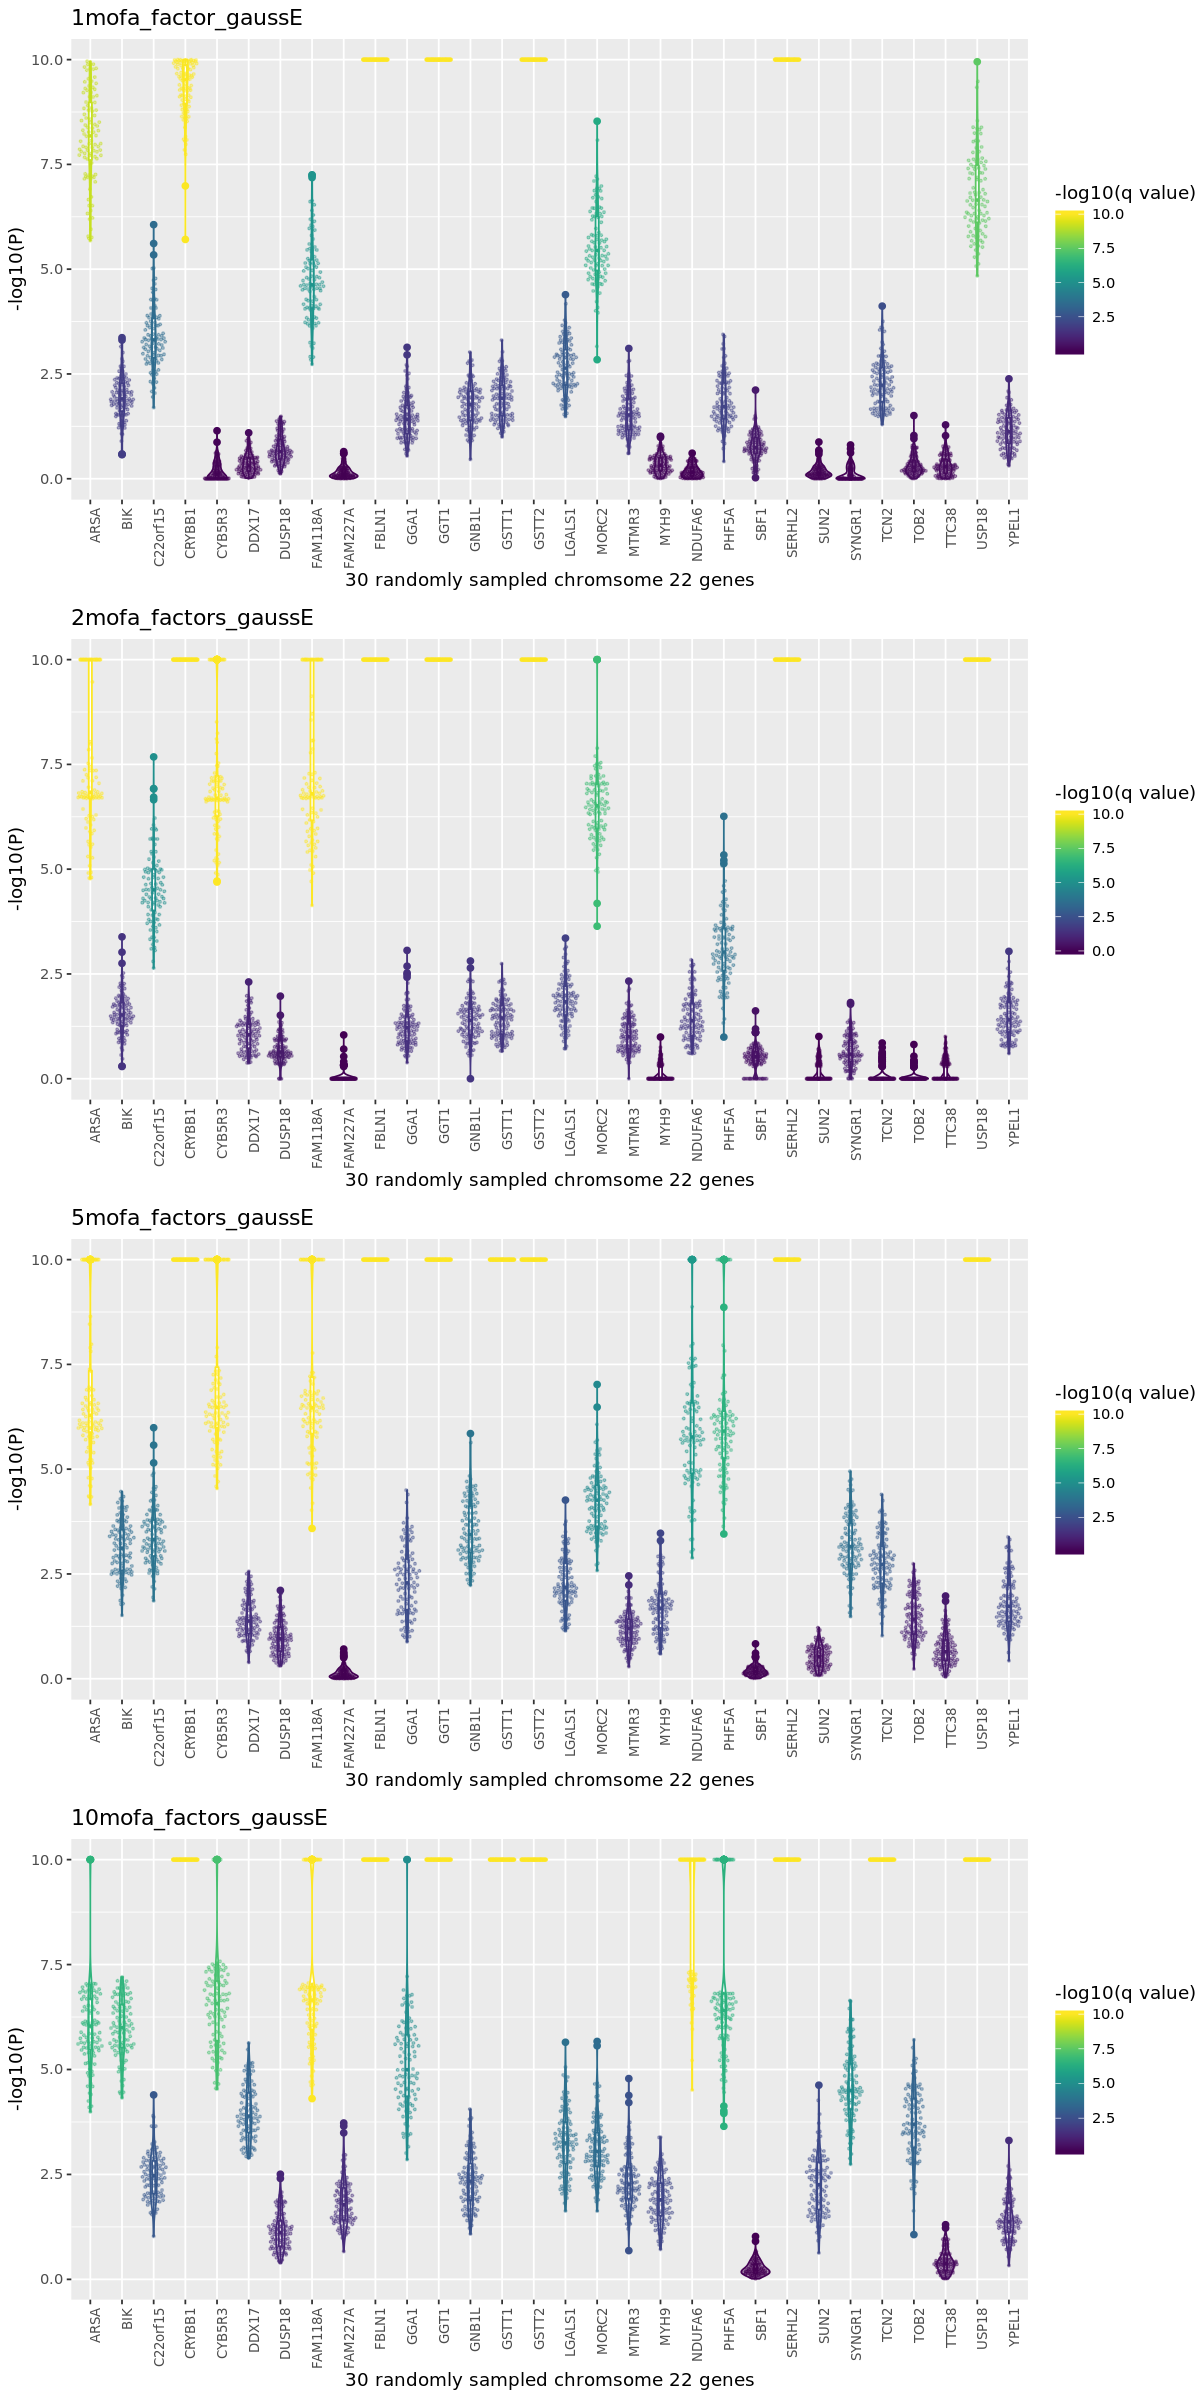

In [201]:
options(repr.plot.width = 10, repr.plot.height = 20)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 1)

In [ ]:
#########################################################
##### gaussianise E and y
## all cells, all donors

In [327]:
file = paste0(mydir,"/10mofa_factors_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv")
file = paste0(mydir,"/5mofa_factors_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv")
file = paste0(mydir,"/2mofa_factors_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv")
file = paste0(mydir,"/1mofa_factor_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv")
df = read.csv(file, row.names=1)
nrow(df)
head(df,2)

[1] 121

gene                  n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A 3      7.399090e-10 22_42896474_T_C 2.219727e-09
1 ENSG00000189306_RRP7A 3      1.071033e-09 22_42897414_A_C 3.213098e-09

In [328]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
df$qv = p.adjust(df$pv, method = "BH")

In [329]:
mofa1 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa1

[1] 88.0 44.0  0.5

In [322]:
mofa2 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa2

[1] 88.0000000 50.0000000  0.5681818

In [316]:
mofa5 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa5

[1] 88.0000000 59.0000000  0.6704545

In [313]:
mofa10 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa10

[1] 88.0000000 57.0000000  0.6477273

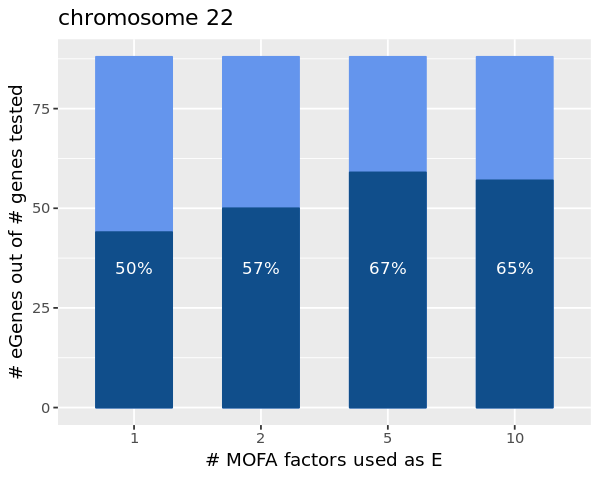

In [330]:
df = data.frame(n_MOFA = c(1,2,5,10), n_eGenes = c(mofa1[2],mofa2[2],mofa5[2],mofa10[2]), n_genes = mofa1[1])
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=35, label= paste0(round(mofa1[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=35, label= paste0(round(mofa2[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=35, label= paste0(round(mofa5[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=35, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [331]:
prefixes = c("1mofa_factor_endo_eqtl_gaussE_gaussY",
             "2mofa_factors_endo_eqtl_gaussE_gaussY",
             "5mofa_factors_endo_eqtl_gaussE_gaussY",
             "10mofa_factors_endo_eqtl_gaussE_gaussY")

In [332]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

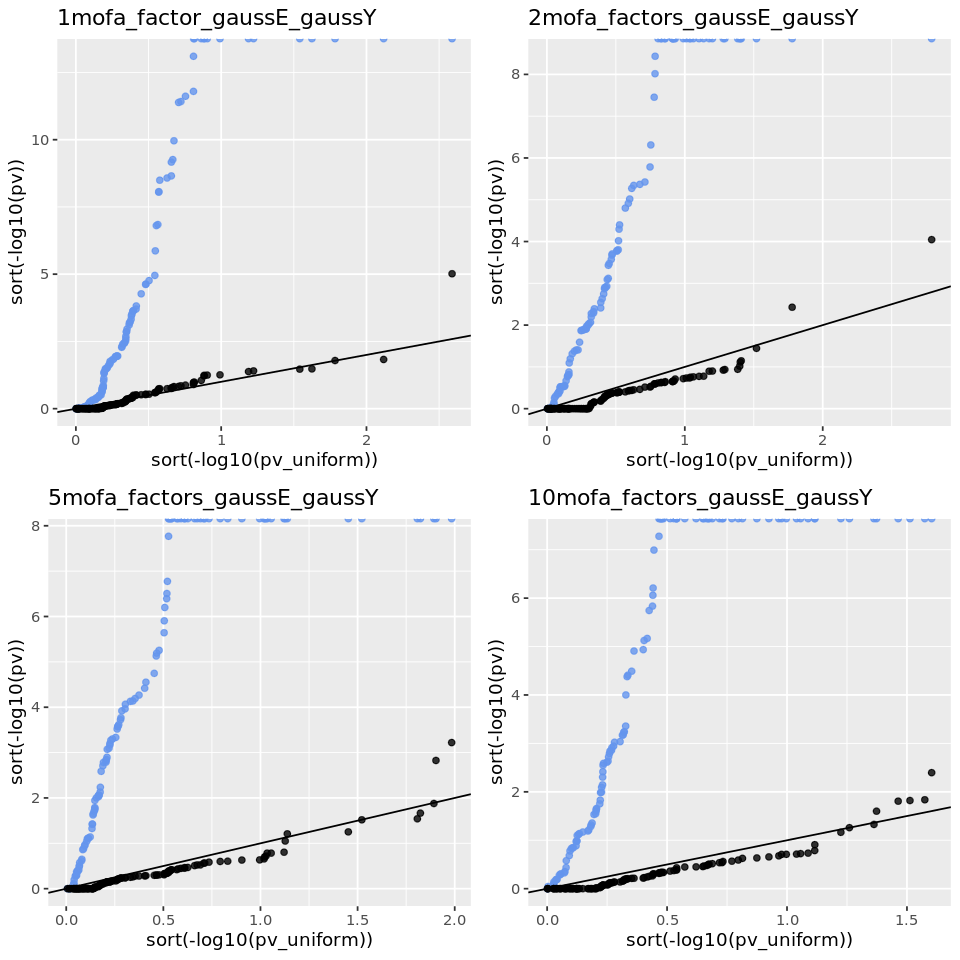

In [333]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

In [414]:
prefixes = c("1mofa_factor_endo_eqtl_bootstrap_gaussE_gaussY",
             "2mofa_factors_endo_eqtl_bootstrap_gaussE_gaussY",
             "5mofa_factors_endo_eqtl_bootstrap_gaussE_gaussY",
             "10mofa_factors_endo_eqtl_bootstrap_gaussE_gaussY")

In [420]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromosome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")


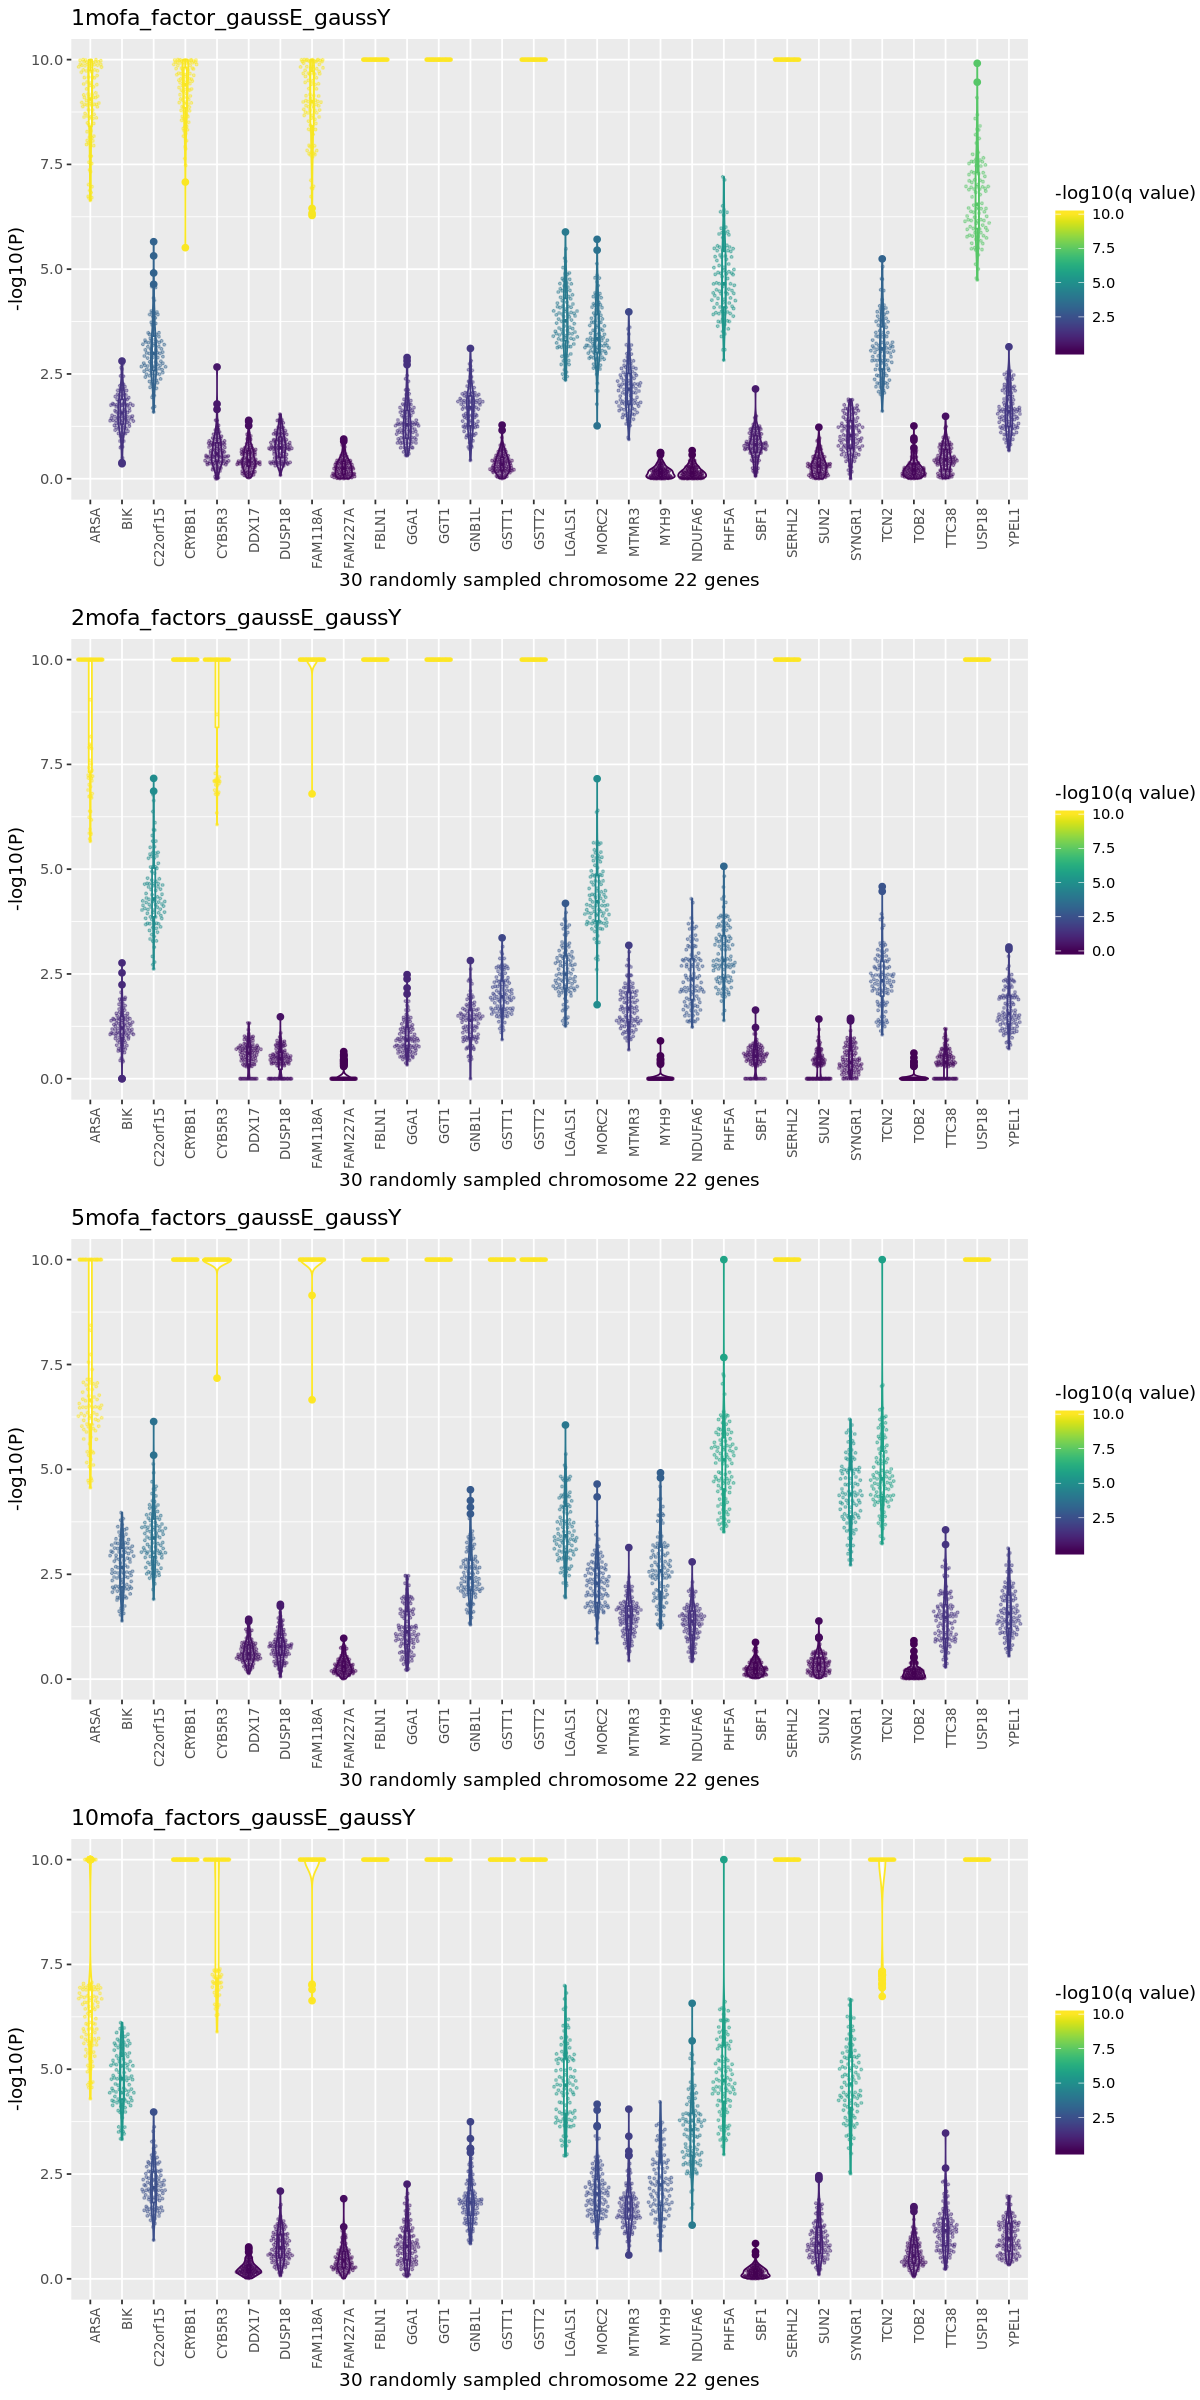

In [421]:
options(repr.plot.width = 10, repr.plot.height = 20)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 1)

In [516]:
#########################################################
##### column normalise E
## all cells, all donors

In [574]:
file = paste0(mydir,"/10mofa_factors_endo_eqtl_normE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/5mofa_factors_endo_eqtl_normE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/2mofa_factors_endo_eqtl_normE/summary_endo_eqtl.csv")
# file = paste0(mydir,"/1mofa_factor_endo_eqtl_normE/summary_endo_eqtl.csv")
df = read.csv(file, row.names=1)
nrow(df)
head(df,2)

[1] 121

gene                  n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A 3      3.138274e-06 22_42896474_T_C 9.414822e-06
1 ENSG00000189306_RRP7A 3      1.733143e-06 22_42897414_A_C 5.199428e-06

In [575]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
df$qv = p.adjust(df$pv, method = "BH")

In [567]:
mofa1 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa1

[1] 88.0000000 46.0000000  0.5227273

In [570]:
mofa2 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa2

[1] 88.0000000 52.0000000  0.5909091

In [573]:
mofa5 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa5

[1] 88.00 66.00  0.75

In [576]:
mofa10 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
mofa10

[1] 88.0000000 78.0000000  0.8863636

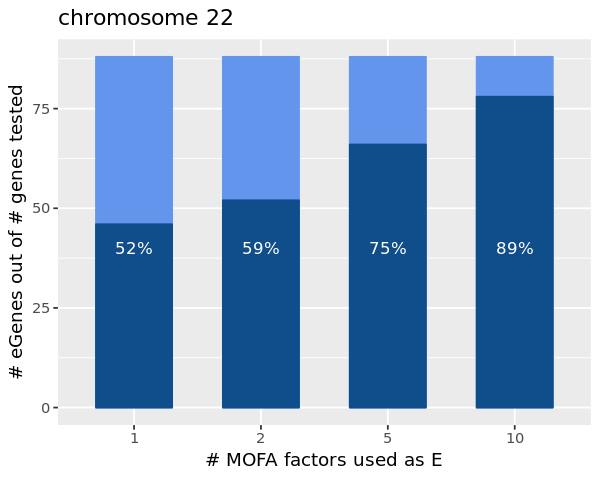

In [577]:
df = data.frame(n_MOFA = c(1,2,5,10), n_eGenes = c(mofa1[2], mofa2[2], mofa5[2], mofa10[2]), n_genes = mofa1[1])
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_MOFA), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_MOFA), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# MOFA factors used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=40, label= paste0(round(mofa1[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=40, label= paste0(round(mofa2[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=40, label= paste0(round(mofa5[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=40, label= paste0(round(mofa10[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [687]:
prefixes = c("1mofa_factor_endo_eqtl_normE",
             "2mofa_factors_endo_eqtl_normE",
             "5mofa_factors_endo_eqtl_normE",
             "10mofa_factors_endo_eqtl_normE")

In [688]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

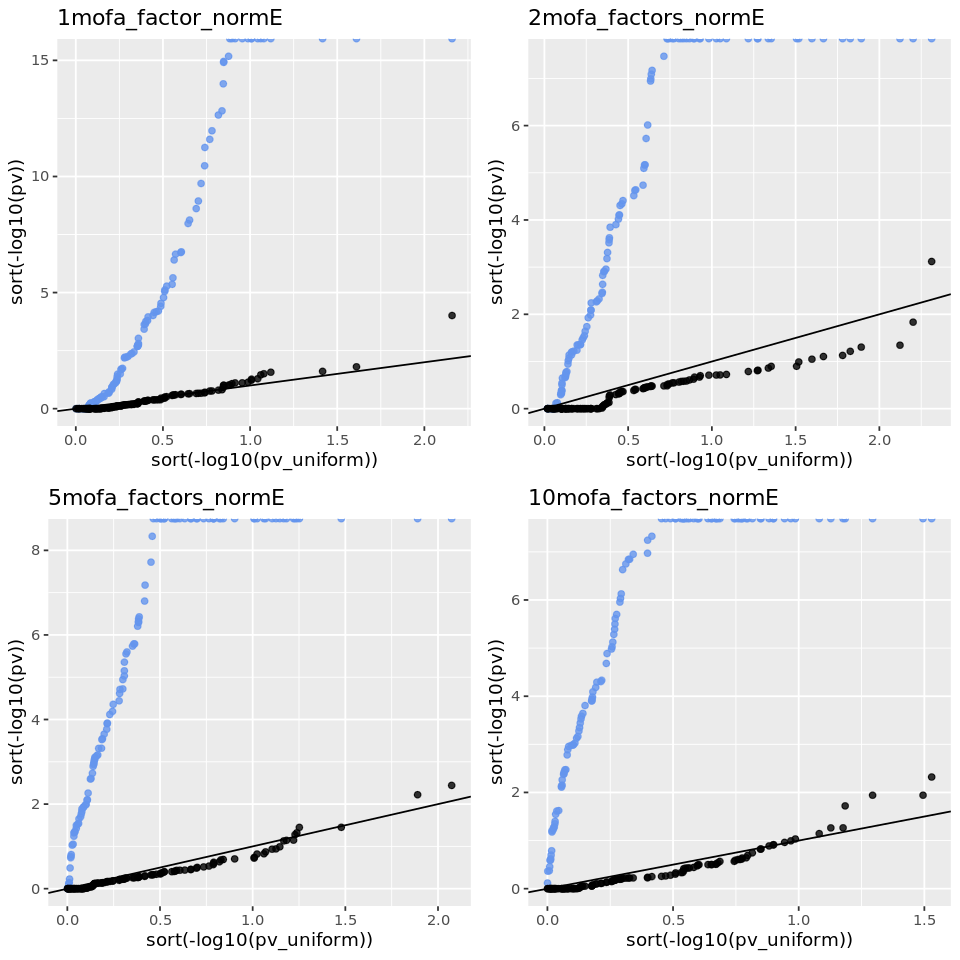

In [689]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],ncol = 2)

In [692]:
k = 1
plist = list()
labs = gsub("mofa_factor_endo_eqtl_normE","",gsub("mofa_factors_endo_eqtl_normE","",prefixes))
for (i in 1:(length(prefixes)-1)){
    prefix = prefixes[i]
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    for (j in (i+1):length(prefixes)){
        file1 = paste0(mydir,prefixes[j],"/summary_endo_eqtl.csv")
        df1 = read.csv(file1, row.names=1)
        df1 = df1[df1$gene %in% chrom_22$feature,] 
        df = inner_join(df0, df1,by = c("gene","snpID","n_snps"))
        p = ggplot(df, aes(x = -log10(pv.x), y = -log10(pv.y)))
        p = p + geom_point(alpha = 0.8, col = "firebrick") 
        p = p + geom_abline(slope = 1, col = "firebrick")
        plist[[k]] = p + ggtitle(paste0(labs[i]," vs ",labs[j], " MOFA, R = ", 
                                        round(cor(df$pv.x, df$pv.y), digits = 2))) 
        k = k+1
    }
} 

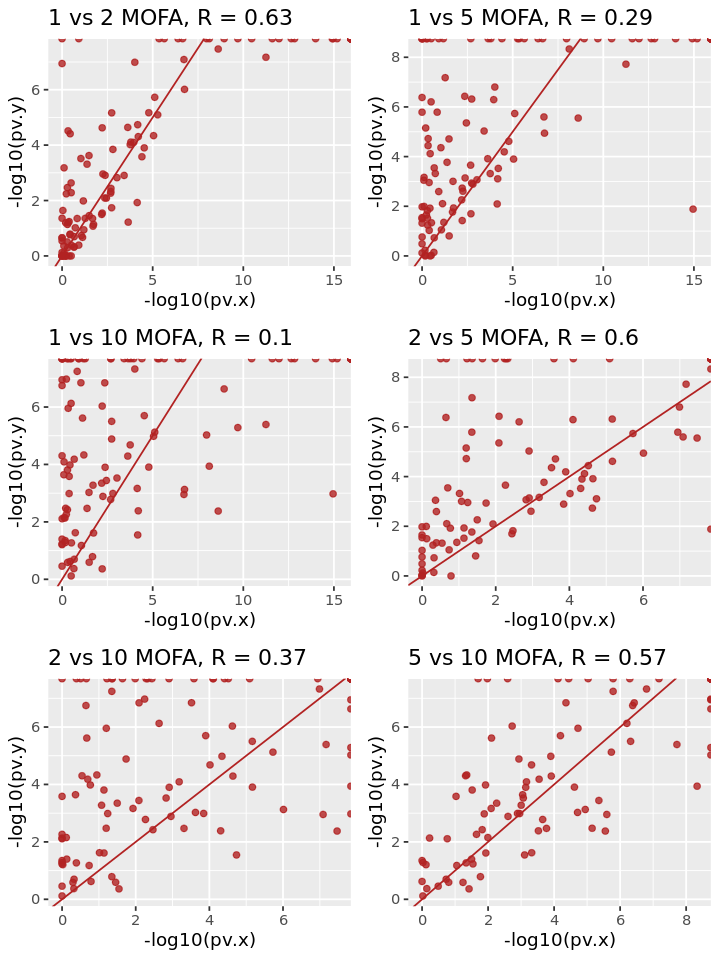

In [694]:
options(repr.plot.width = 6, repr.plot.height = 8)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 2)